# Ensemble Learning

- It is an advanced machine learning technique where multiple models/algorithms are combined to improve the accuracy and robustness of the predictions.
- The main idea here is to leverage the strengths of individual models and reduce their weaknesses by combining their predictions.
- There are three main types:
    - **Bagging** (short for **B**ootstrap **Agg**regation)
        - It works by training multiple copies of the same model on different subsets of the training data
        - This is done by sampling the training data with replacement and oversampling, which means some data is included in multiple models and some is synthetic 
        - The architecture is parallel
        - It's typically homogenous
        - It helps reduce the variance of the model, which can improve accuracy and reduce overfitting.
    - **Boosting**
        - It works by training multiple models sequentially
        - Each model is focuses on learning from the previous model's errors (boosting here comes from boosting accuracy)
        - The architecture is sequential
        - It's typically homogenous
        - It helps reduce the bias of the model, which can improve accuracy and reduce underfitting.
        - Steps:
            1. Model 1 trains on 800 records
            2. Model 1 makes errors (100 records)
            3. Weight adjustment: important step. this is where the algo assigns weights for each record. The misclassified records/errors have higher weight values than the accurate predictions 
            4. Model 2 focuses on the 100 records with high weight values to work on fixing the errors from the previous model. 
            5. Let's say it fixed 50, so we have 50 errors left
            6. Model 4 focuses on the 50 records with high weight
        - The errors with the lowest confidence get the highest wait. It's like telling the subsequent model "Hey - pay more attention to these challenging data points"
    - **Stacking**
        - It's the most complex form of Ensemble Learning
        - It works by combining multiple different models/algorithms (base learners)
        - The output of all base the models is combined to make up the training data for the final modle (called Meta Model)
        - The architecture is multiple base learners in parallel followed by the meta model
        - It helps improve both overfitting and underfitting. It can achieve better outcome than Boosting and Bagging, but it's computationally costly 
        - It's heterogeneous 


![BaggingBoosting](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zTgGBTQIMlASWm5QuS2UpA.jpeg)

## Bagging

![bg](https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png)

Although we can take a Random Forest Model out-of-the-box, we can also build it from scratch.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
url="http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabetes']

df = pd.read_csv(url, names=col_names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Prep the data

#### X and y Split

In [48]:
X = df.drop(columns='diabetes', axis=1)
y = df['diabetes']

> We typically need to spend ample time on EDA and Feature Engineering, but we skipped them this time since we've done enough examples before and for time constraints. 

#### Cross Validation and Model Definition

In [49]:
kfold = KFold(n_splits=10)

In [50]:
dtc_model = DecisionTreeClassifier()
#hyperparameter for the number of learners
num_trees = 100

### Deploy The Bagging Classifier with Cross-Validation

In [51]:
bc_model = BaggingClassifier(estimator=dtc_model, n_estimators=num_trees, random_state=12)

In [52]:
results = cross_val_score(bc_model, X, y, cv=kfold)
results

array([0.64935065, 0.83116883, 0.75324675, 0.66233766, 0.77922078,
       0.83116883, 0.83116883, 0.83116883, 0.71052632, 0.78947368])

In [53]:
len(results)

10

To get the final accuracy score, you need to take the average

In [54]:
print(f'Overall Accuracy from Cross-Validation: {results.mean():.2f}')

Overall Accuracy from Cross-Validation: 0.77


- You can choose any type of estimator (algorithm) for `BaggingClassifier`. 
- Recommended models that work well with Ensemble Bagging:
    - Decision Tree Classifier
    - Logistic Regression
    - SVC
    - K Neighbors Classifier

> To use the learning after Corss-Validation, once you're happy with the outcome, you need to fit the model again on the full dataset, not need to split by train and test.

## Boosting

![seq](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

![gradientboosting](https://www.researchgate.net/publication/356698772/figure/fig2/AS:1096436418641951@1638422221975/The-architecture-of-Gradient-Boosting-Decision-Tree.png)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

In [56]:
gbc_model = GradientBoostingClassifier(n_estimators=100 #count of trees 
                                       , learning_rate=0.1 #contribution of each tree (learning from errors rate)
                                       , max_depth=3) #depth of each tree in the boosting algorithm

In [57]:
kfold = StratifiedKFold(n_splits=8, random_state=20
                        , shuffle=True) #it shuffles data before splitting in case your data is sorted originally

In [58]:
results = cross_val_score(gbc_model, X, y, cv=kfold, scoring='accuracy')
results

array([0.77083333, 0.76041667, 0.70833333, 0.75      , 0.76041667,
       0.71875   , 0.8125    , 0.77083333])

In [59]:
results.mean()

0.7565104166666667

In [60]:
results = cross_val_score(bc_model, X, y, cv=kfold, scoring='f1')
results.mean()

0.6415487737805301

For different score types

> In most cases, especially when you need more than just the scores or want to access the fitted estimators, cross_validate is the preferred and more powerful function. cross_val_score is handy for quick initial checks.

In [61]:
scoring_types = ['precision_macro', 'recall_macro']

scores = cross_validate(gbc_model, X, y, scoring=scoring_types, cv=kfold)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [62]:
scores['test_precision_macro'].mean()

0.7388409752499722

In [63]:
scores['test_recall_macro'].mean()

0.7200121128607846

### Hyperparameter Tuning with Ensemble Methods (e.g. Bagging)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification  # For creating sample data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the Base Estimator (Decision Tree)
dtc = DecisionTreeClassifier(random_state=42)  # Important to set random_state for reproducibility

# 3. Define the Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],  # Fraction of samples to draw for each estimator
    'max_features': [0.5, 0.7, 1.0],  # Fraction of features to draw for each estimator
    'estimator__max_depth': [None, 5, 10],  # Max depth of the decision tree (base estimator)
    'estimator__min_samples_split': [2, 5, 10] # Min samples split for the decision tree
}

# 4. Create the Bagging Classifier with the Base Estimator
bagging_clf = BaggingClassifier(estimator=dtc, random_state=42)

# 5. Perform GridSearchCV
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1) # n_jobs=-1 uses all available cores

# 6. Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# 7. Print Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 8. Evaluate on the Test Set (using the best estimator)
best_bagging_clf = grid_search.best_estimator_
test_accuracy = best_bagging_clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)




Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 10, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Best Score: 0.7948154071704652
Test Accuracy: 0.7532467532467533


In [80]:
# Example of how to access individual base estimators after grid search
# After fitting the grid search, the best estimator is available as grid_search.best_estimator_
# And you can access the individual estimators like this:
best_estimators = grid_search.best_estimator_.estimators_
print(len(best_estimators)) # prints the number of estimators
print(best_estimators[0]) # prints the first estimator (a decision tree)

50
DecisionTreeClassifier(min_samples_split=10, random_state=1952926171)


## AUC ROC

- AUC: Area Under the Curve & ROC: Receiver Operating Characteristic Curve
- AUC-ROC is a widely used evaluation method mainly for binary classification that plots a graph that measures how well a machine learning model can classify data
- It's also useful for comparing the performance across different models

How it works
- The ROC curve plots the true positive rate (TPR) versus the false positive rate (FPR) at different classification thresholds
- We have 2 axes:
    - TPR: True Positive Rate (y-axis)
    - FPR: False Positive Rate (x-axis) 
- The AUC is the area under the ROC curve 
- The AUC is a value between 0 and 1, with larger values indicating better performance 
- A perfect model has an AUC of 1, while a random model has an AUC of 0.5 

![auc](https://miro.medium.com/v2/resize:fit:1358/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

## Exercise:
using the same diabetes dataset, build a process that deploys 4 different ensemble learning models and evaluates the best model based on AUC-ROC Curve.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [66]:
plt.style.use('ggplot')

1. Define multiple Ensemble models and cross validation method

In [70]:

models = {
    #Bagging
    'BaggingkNN': BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100), 
    'RandomForest': RandomForestClassifier(n_estimators=100),
    #Boosting
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100), 
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100)

}

In [71]:
cv_method = StratifiedKFold(n_splits=8, shuffle=True, random_state=12)

2. Automate training, cross-validation, plotting

BaggingkNN: AUC-ROC = 0.7592126865671641
RandomForest: AUC-ROC = 0.8301194029850747
AdaBoost: AUC-ROC = 0.6735074626865671
GradientBoosting: AUC-ROC = 0.8349104477611939


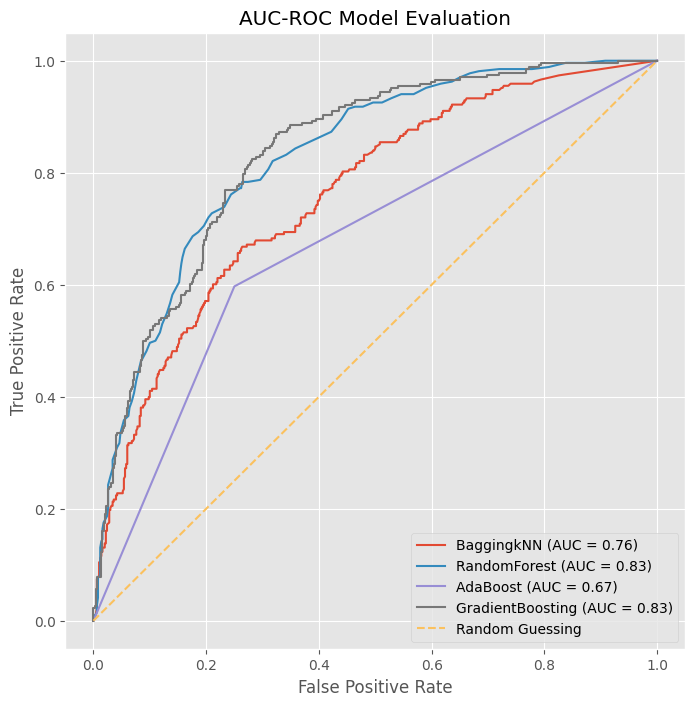

In [ ]:
plt.figure(figsize=(8,8))
for name, model in models.items():
    #cross validation training and prediction with probability
    y_pred_proba = cross_val_predict(model, X, y, cv=cv_method, method='predict_proba')[:,1]

    #calculate the auc score and curve
    auc = roc_auc_score(y, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc}')

    # false positive rate and true positive rate
    fpr, tpr, thresh = roc_curve(y, y_pred_proba)

    #build the plot for each curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


#add the diagonal line
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Model Evaluation')
plt.legend()


**Observation**
- AdaBoost model performed the worst (the closest one to random guessing)
- Gradient Boosting performed the best (very close to the top left corner and highest AUC)
- Other models were very close

Without Cross-Validation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

BaggingLogReg: AUC-ROC = 0.8268135904499541
RandomForest: AUC-ROC = 0.836455463728191
AdaBoost: AUC-ROC = 0.7656565656565657
GradientBoosting: AUC-ROC = 0.8514233241505968


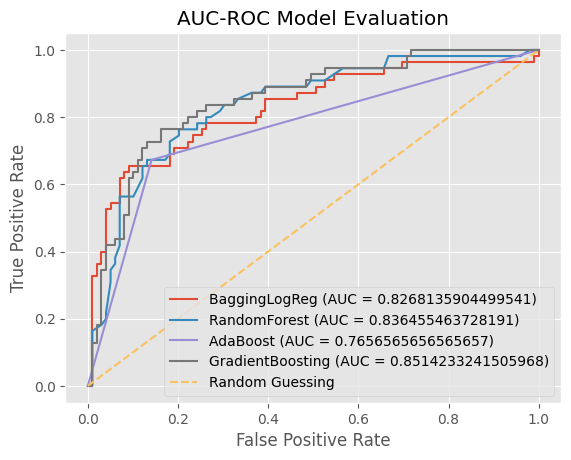

In [22]:
for name, model in models.items():
    #model fit
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    #calculate the auc score and curve
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc}')

    # false positive rate and true positive rate
    fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)

    #build the plot for each curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc})')


#add the diagonal line
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Model Evaluation')
plt.legend()


> If your curve is below random, you may as well throw out your model and buy a good old coin!

#### Choosing the Optimatl

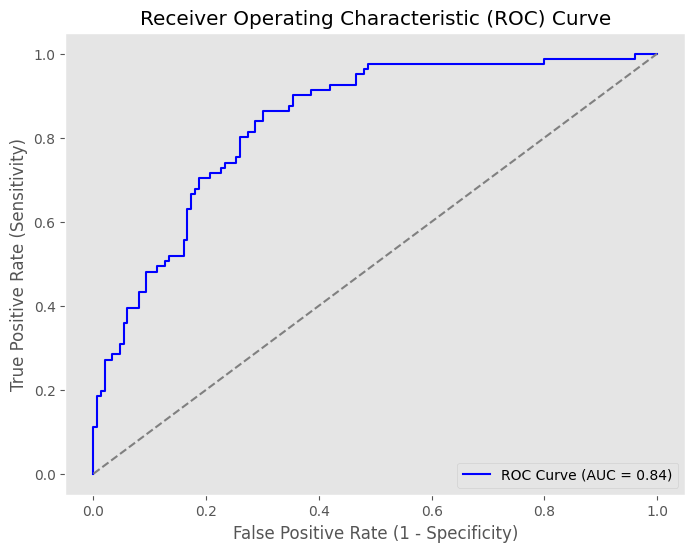

Optimal Threshold: 0.26
Confusion Matrix:
[[105  45]
 [ 11  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       150
           1       0.61      0.86      0.71        81

    accuracy                           0.76       231
   macro avg       0.76      0.78      0.75       231
weighted avg       0.80      0.76      0.76       231



In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Find the optimal threshold using Youden's J statistic (best balance between TPR and FPR)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.2f}')

# Classify using the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the performance with the new threshold
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_optimal))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_optimal))
